In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [71]:
results = {
    "Smiling": {
#         "rosy-10": pd.read_csv(f"celeba_xy_y_on_recons_rosy-feather-1497_Smiling_epoch10_new.csv"),
        "Ours – cFlow": pd.read_csv("celeba_xy_y_on_recons_rosy-feather-1497_Smiling_epoch30.csv"),
        "Ours – cVAE": pd.read_csv("celeba_xy_y_on_recons_stellar_lion_cvae_celeba_results_Gender_Smiling.csv"),
#         "stellar-40": pd.read_csv("celeba_xy_y_on_recons_stellar-planet-1474_Smiling_epoch40.csv"),
#         "Ln2L": pd.read_csv("celeba_ln2l_Male_Smiling_0.01ew_40epochs_ln2l_celeba.csv"),
        "CNN": pd.read_csv("celeba_naive_baseline_Male_Smiling_25epochs.csv"),
    }
}
for target in (
#     "Oval_Face",
    "High_Cheekbones",
):
    results[target] = {
#         "rosy-10": pd.read_csv(f"celeba_xy_y_on_recons_rosy-feather-1497_{target}_epoch10_new.csv"),
        "Ours – cFlow": pd.read_csv(f"celeba_xy_y_on_recons_rosy-feather-1497_{target}_epoch30.csv"),
        "Ours – cVAE": pd.read_csv(f"celeba_xy_y_on_recons_stellar_lion_cvae_celeba_results_Gender_{target}.csv"),
#         "stellar-40": pd.read_csv(f"celeba_xy_y_on_recons_stellar-planet-1474_{target}_epoch40.csv"),
#         "Ln2L": pd.read_csv(f"celeba_ln2l_Male_{target}_0.01ew_25epochs_ln2l_celeba.csv"),
        "CNN": pd.read_csv(f"celeba_naive_baseline_Male_{target}_40epochs.csv"),
    }

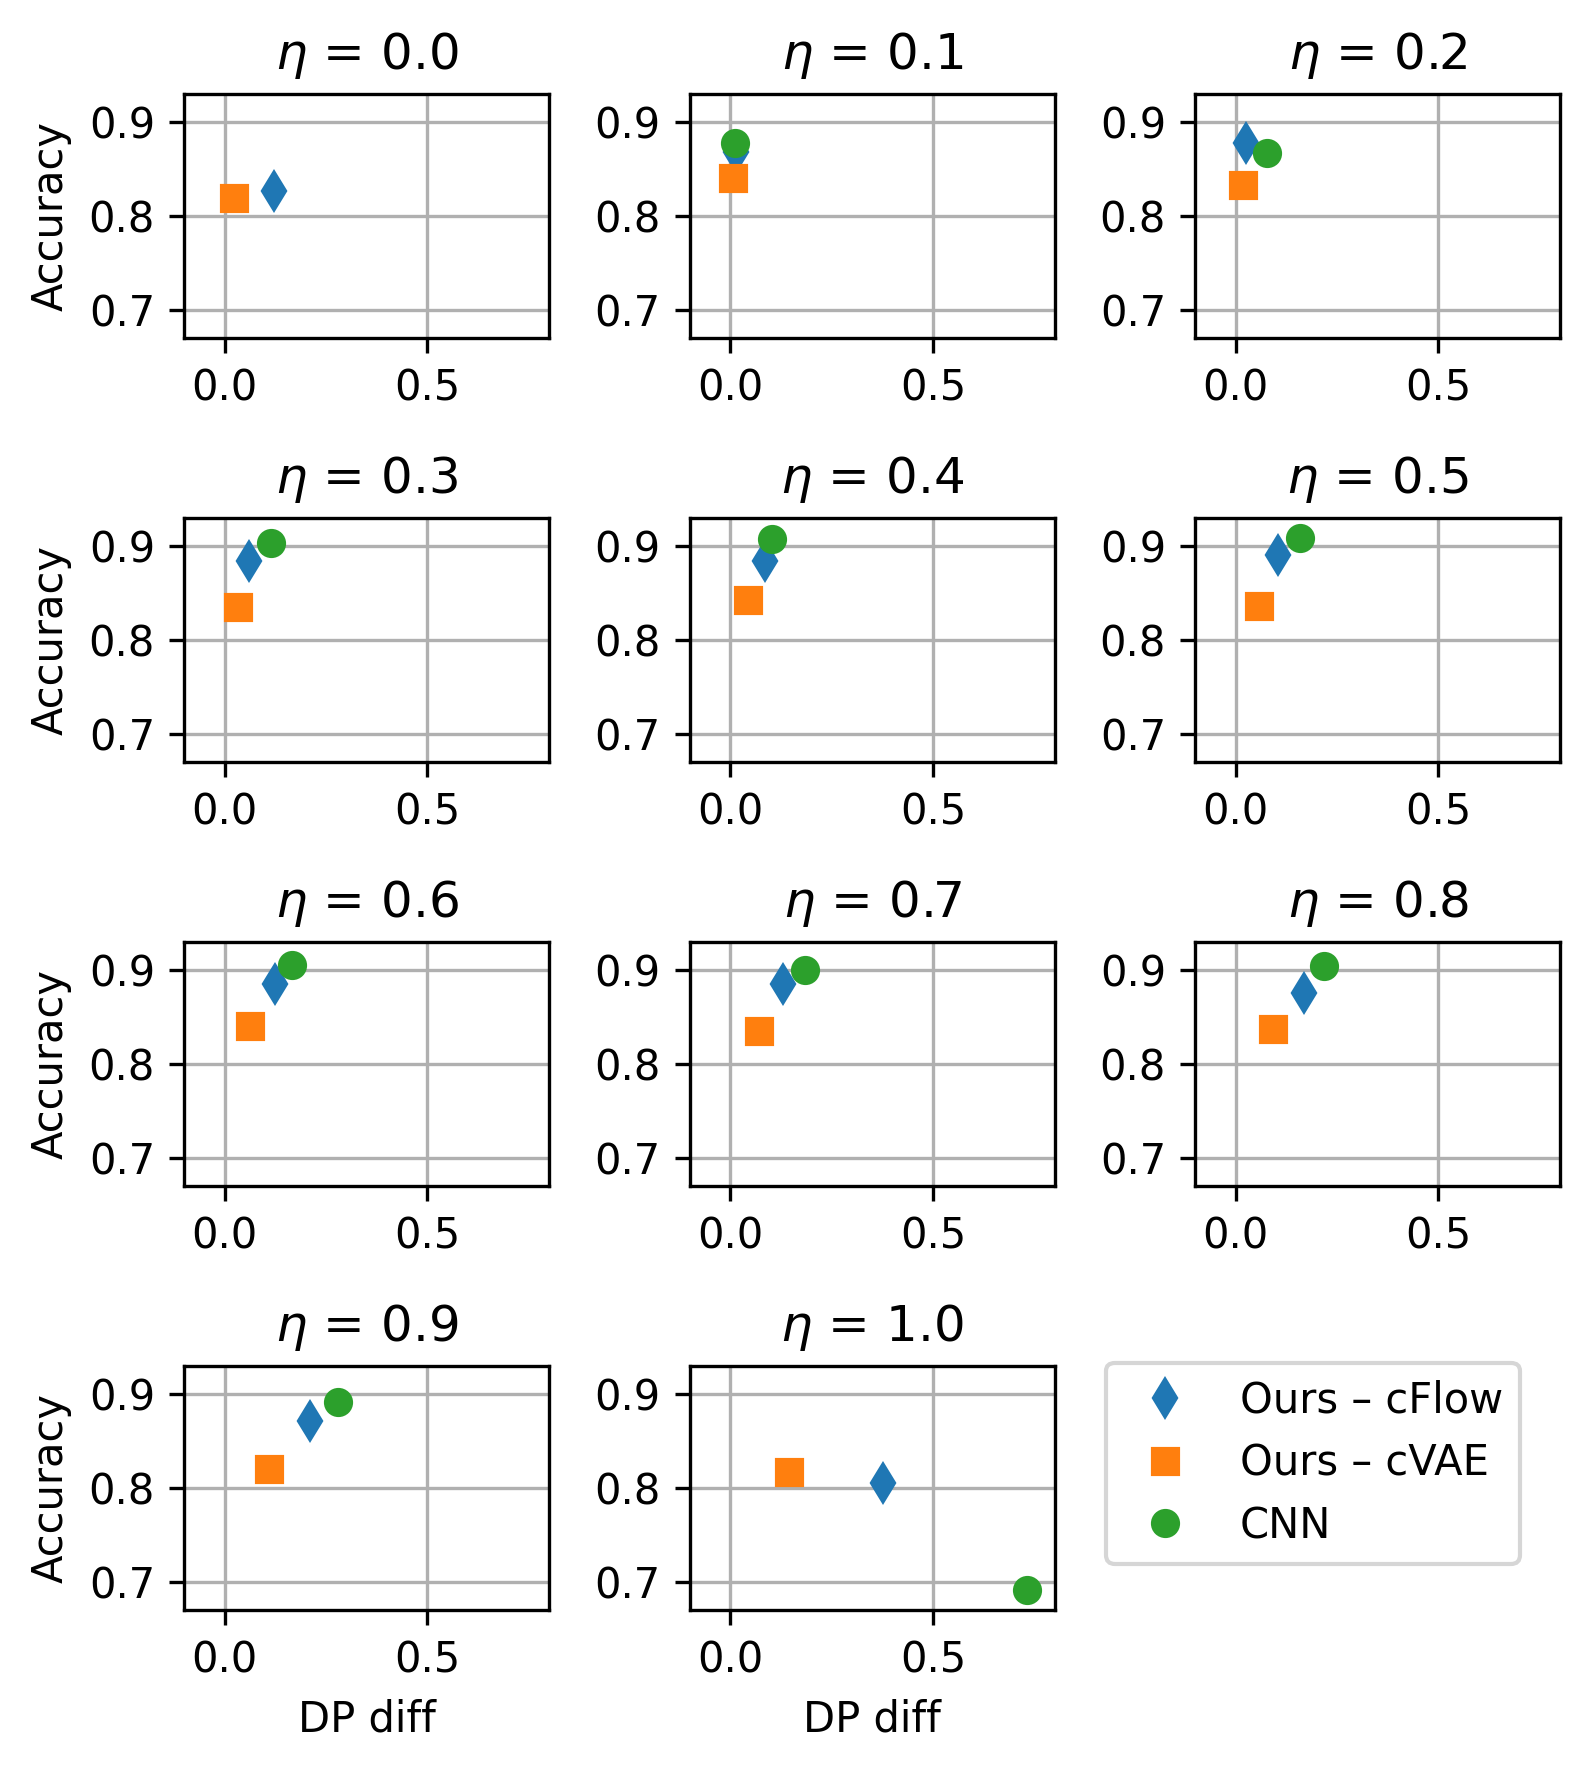

In [9]:
to_plot = results["Smiling"]
fig, plots = plt.subplots(nrows=4, ncols=3, figsize=(5.4, 6), dpi=300, facecolor="white")
flat_plots = []
for plot in plots:
    flat_plots += plot.tolist()

for i, (plot, mix_fact) in enumerate(zip(flat_plots, [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1., None])):
    for method, shape in zip(to_plot, ("d", "s", "o", "x")):
        data = to_plot[method].query(f"Mix_fact == \"{mix_fact}\"")
        plot.plot(data["prob_pos_sex_Male_0.0-sex_Male_1.0"], data["Accuracy"], marker=shape, linestyle="", label=method)
    if mix_fact is not None:
        plot.set_title(f"$\\eta$ = {mix_fact}")
    plot.grid(True)
#     plot.set_xlim((0, 1))
    plot.set_xlim((-.1, 0.8))
    plot.set_ylim((0.67, 0.93))
    if i == 11:
        plot.axis("off")
        plot.legend(loc='upper left', bbox_to_anchor=(-0.3, 1.1))
    if i in (9, 10):
#         plot.set_xlabel(r"$P(\hat{Y}=1|S=0)/P(\hat{Y}=1|S=1)$")
        plot.set_xlabel("DP diff")
    if i in (0, 3, 6, 9):
        plot.set_ylabel("Accuracy")

fig.tight_layout()
# fig.savefig("nosinn_celeba_multiplot_all.pdf")

In [76]:
def multi_plot(results, target, xlim=None, ylim=None):
    fig, plots = plt.subplots(nrows=3, ncols=4, figsize=(7, 4.5), dpi=300)
    flat_plots = []
    for plot in plots:
        flat_plots += plot.tolist()

    for i, (plot, mix_fact) in enumerate(zip(flat_plots, [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1., None])):
        for method, shape in zip(results[target], ("d", "s", "o", "x")):
            data = results[target][method].query(f"Mix_fact == \"{mix_fact}\"")
            plot.plot(data["prob_pos_sex_Male_0.0-sex_Male_1.0"], data["Accuracy"], marker=shape, linestyle="", label=method)
        if mix_fact is not None:
            plot.set_title(f"$\\eta$ = {mix_fact}")
        plot.grid(True)
        if i not in (0, 10):
            plot.set_xlim((0, .25))
        else:
            plot.set_xlim(xlim)
        if i not in (0, 10):
            plot.set_ylim((0.8, 0.95))
        else:
            plot.set_ylim(ylim)
        if i == 11:
            plot.axis("off")
            plot.legend(loc='upper left', bbox_to_anchor=(-0.3, 1.1))
        if i in (8, 9, 10):
            plot.set_xlabel("DP diff")
        if i in (0, 4, 8):
            plot.set_ylabel("Accuracy")

    fig.tight_layout()
    fig.savefig(f"nosinn_celeba_multiplot_all_landscape_{target}.pdf")

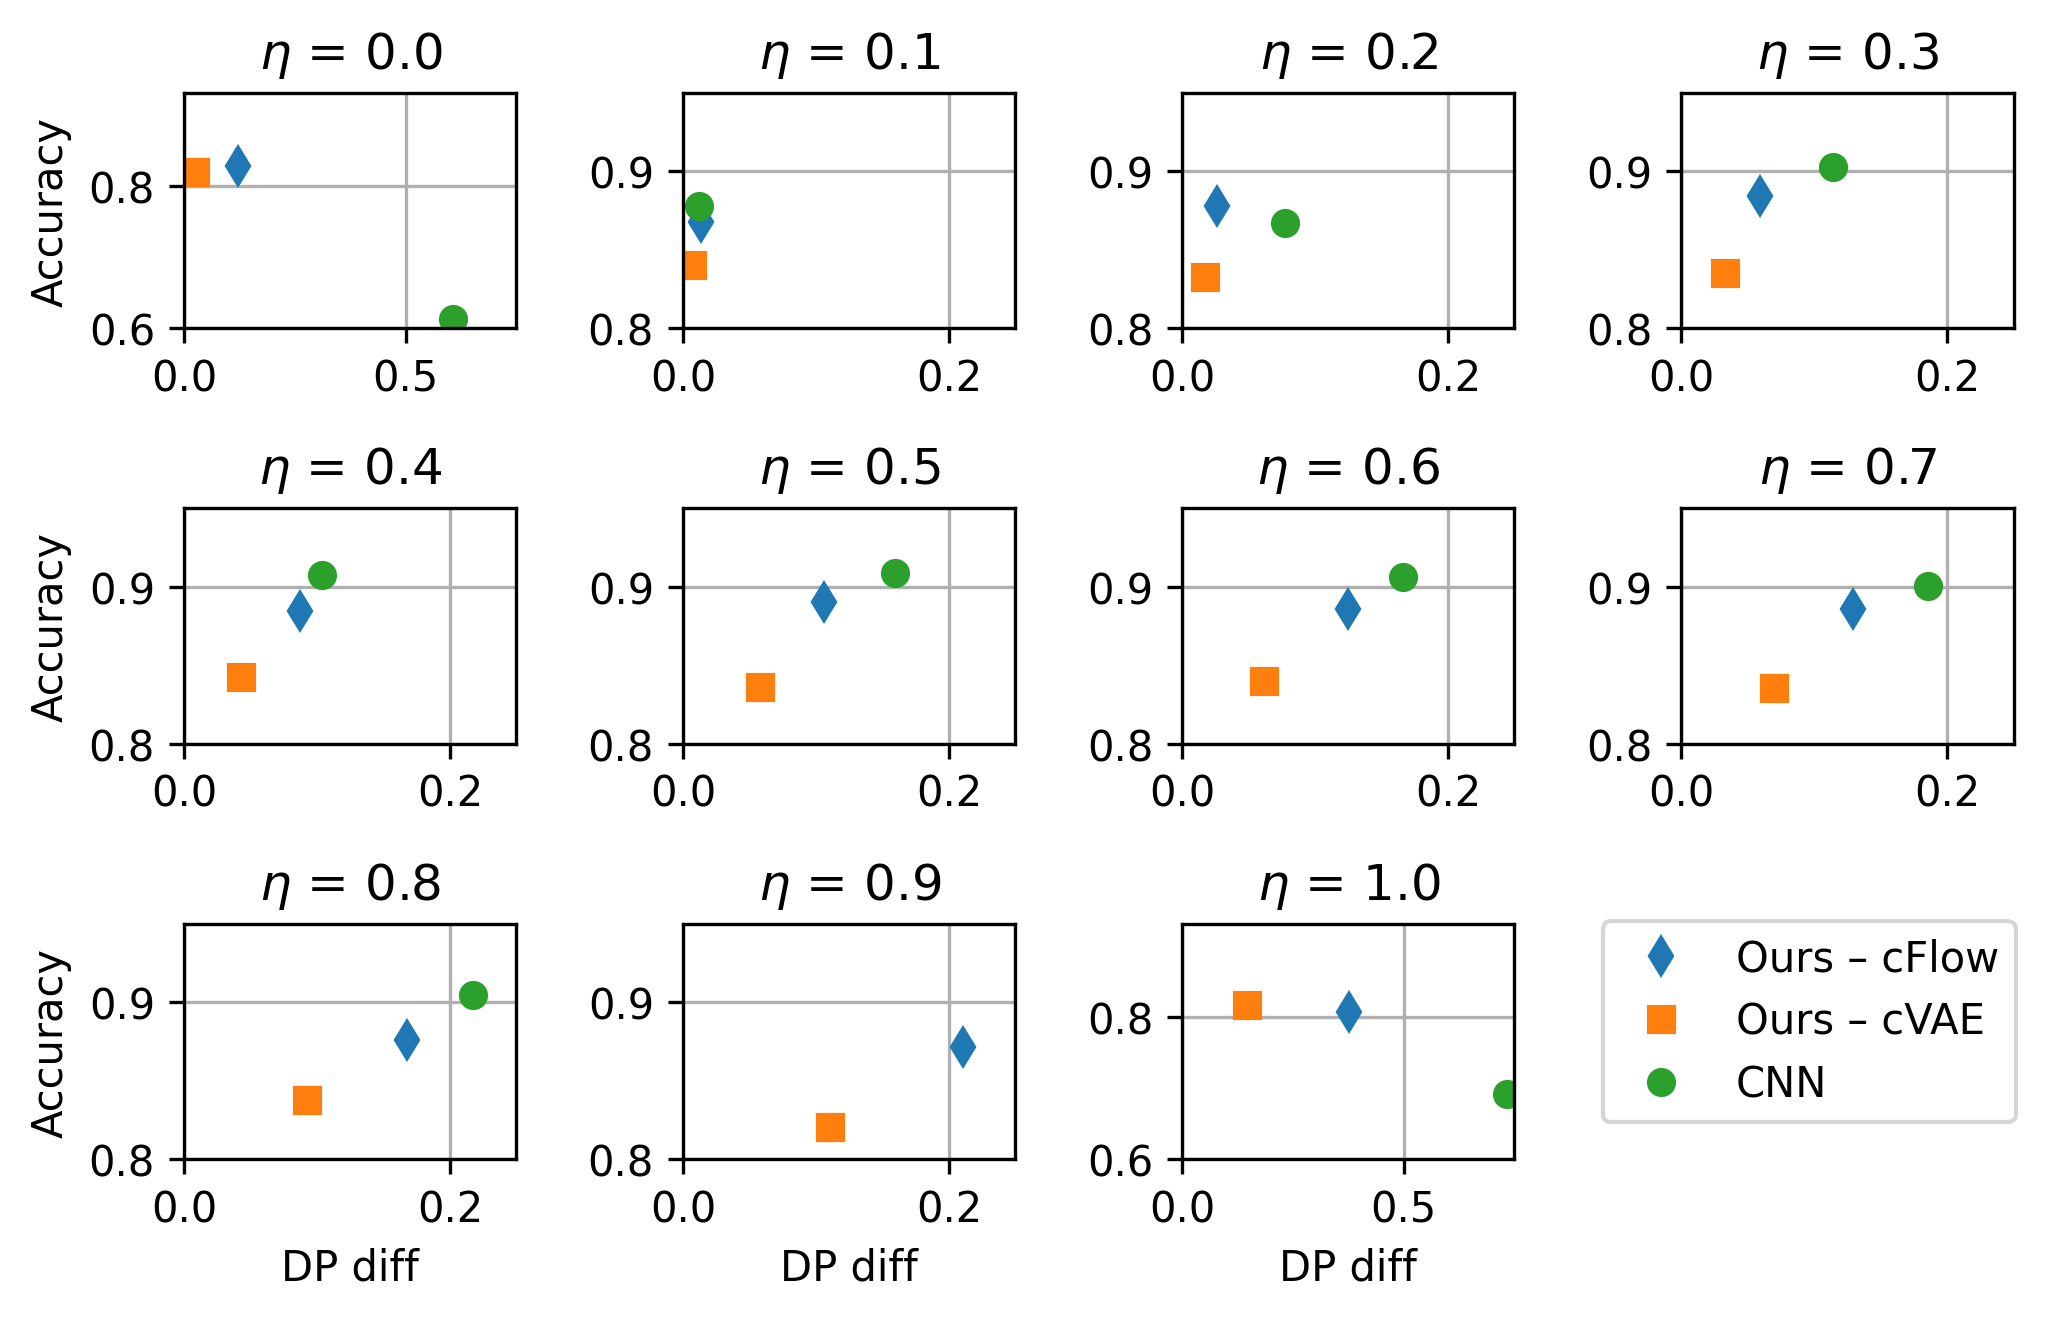

In [77]:
multi_plot(
    results,
    "Smiling",
    xlim=(0, .75),
    ylim=(0.6, 0.93),
)

In [61]:
def single_plot(results, mix_fact=0, xlim=None, ylim=None):
    num_results = len(results)
    fig, plots = plt.subplots(ncols=num_results, figsize=(6, 2), dpi=300)

    for i, (target, plot) in enumerate(zip(results, plots)):
        for method, shape in zip(results[target], ("d", "s", "o", "x")):
            data = results[target][method].query(f"Mix_fact == \"{mix_fact}\"")
            plot.plot(data["prob_pos_sex_Male_0.0-sex_Male_1.0"], data["Accuracy"], marker=shape, linestyle="", label=method)
        plot.set_title(f"{target.replace('_', ' ')}")
        plot.grid(True)
        plot.set_xlim(xlim)
        plot.set_ylim(ylim)
        if i == num_results - 1:
            plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
        plot.set_xlabel("DP diff")
        plot.set_ylabel("Accuracy")

    return fig, plots
#     fig.tight_layout()
#     fig.savefig(f"nosinn_celeba_{target}.pdf")

In [62]:
results["Smiling"].update({
#         "rosy-10": pd.read_csv(f"celeba_xy_y_on_recons_rosy-feather-1497_Smiling_epoch10_new.csv"),
#         "Ours – cFlow": pd.read_csv("celeba_xy_y_on_recons_rosy-feather-1497_Smiling_epoch30.csv"),
#         "Ours – cVAE": pd.read_csv("celeba_xy_y_on_recons_stellar_lion_cvae_celeba_results_Gender_Smiling.csv"),
#         "stellar-40": pd.read_csv("celeba_xy_y_on_recons_stellar-planet-1474_Smiling_epoch40.csv"),
        "Kim et al.": pd.read_csv("celeba_ln2l_Male_Smiling_0.01ew_40epochs_ln2l_celeba.csv"),
#         "CNN": pd.read_csv("celeba_naive_baseline_Male_Smiling_25epochs.csv"),
    })
for target in (
#     "Oval_Face",
    "High_Cheekbones",
):
    results[target].update({
#         "rosy-10": pd.read_csv(f"celeba_xy_y_on_recons_rosy-feather-1497_{target}_epoch10_new.csv"),
#         "Ours – cFlow": pd.read_csv(f"celeba_xy_y_on_recons_rosy-feather-1497_{target}_epoch30.csv"),
#         "stellar-40": pd.read_csv(f"celeba_xy_y_on_recons_stellar-planet-1474_{target}_epoch40.csv"),
        "Kim et al.": pd.read_csv(f"celeba_ln2l_Male_{target}_0.01ew_25epochs_ln2l_celeba.csv"),
#         "CNN": pd.read_csv(f"celeba_naive_baseline_Male_{target}_40epochs.csv"),
    })

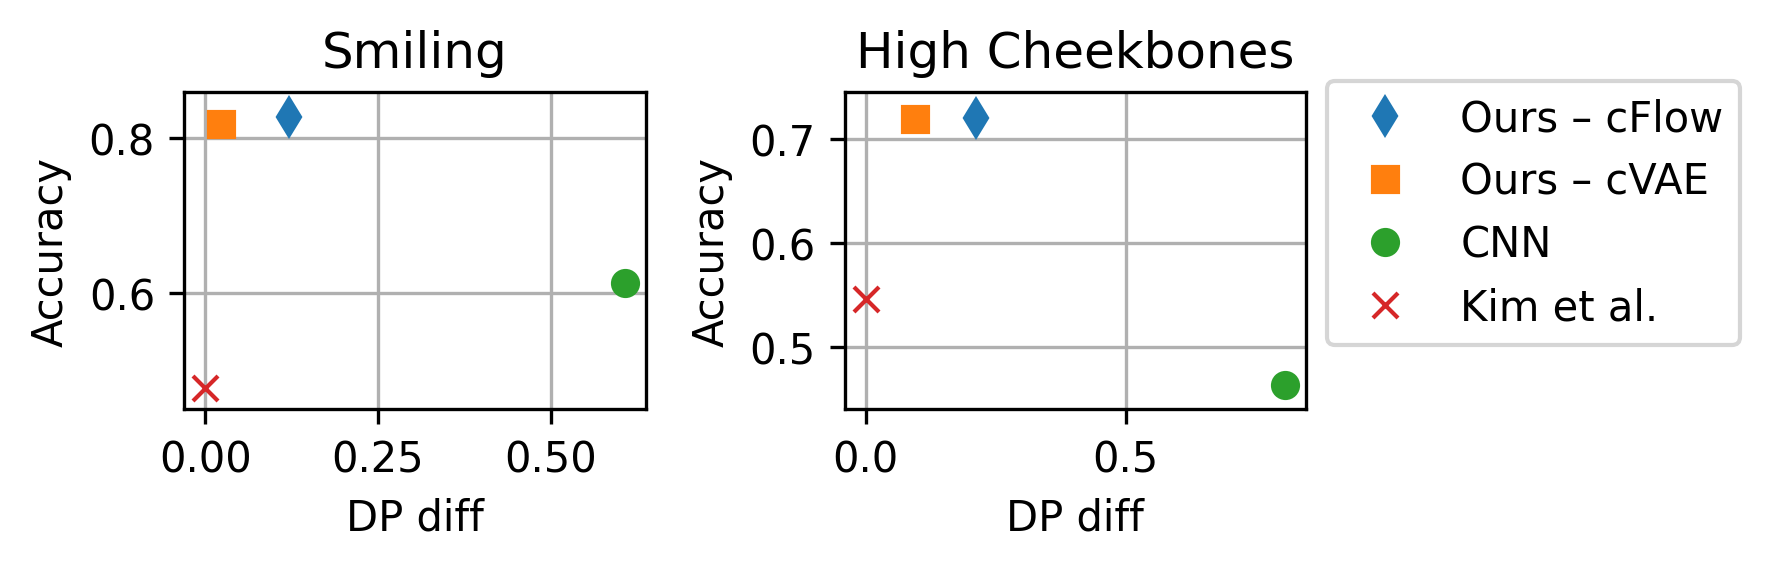

In [70]:
fig, plots = single_plot(results)
plots[0].set_ylim((0.45, .86))
plots[1].set_ylim((0.44, .745))
fig.tight_layout()
fig.savefig("nosinn_celeba.pdf")